# HOUSE PRICE PREDICTION

In [1]:
# import modules
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datasets 
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
# get attribute datatypes
train.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [5]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
# get count of null values
train.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
# N_BEDROOM value counts
train['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [8]:
# N_BATHROOM value counts
train['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [9]:
round(train.QS_OVERALL.mean())

4

In [10]:
train = train.fillna({'N_BEDROOM' : round(train['N_BEDROOM'].mean()), 
                      'N_BATHROOM' : round(train['N_BATHROOM'].mean()),
                      'QS_OVERALL' : round(train['QS_OVERALL'].mean())
                     })

In [11]:
train.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
test.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       19
REG_FEE           0
COMMIS            0
dtype: int64

In [13]:
test = test.fillna({'QS_OVERALL' : round(test['QS_OVERALL'].mean())})

In [14]:
test.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
dtype: int64

In [15]:
def getYear(date):
    y = str(date).split('-')
    if len(y) != 3:
        return 'None'
    return y[-1]

def getMonth(date):
    y = str(date).split('-')
    if len(y) != 3:
        return "None"
    return y[1]

In [16]:
train['MONTH'] = train['DATE_SALE'].map(lambda x : getMonth(x))
train['YEAR'] = train['DATE_SALE'].map(lambda x : getYear(x))

test['MONTH'] = test['DATE_SALE'].map(lambda x : getMonth(x))
test['YEAR'] = test['DATE_SALE'].map(lambda x : getYear(x))

#### DATA VISUALIZATION

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

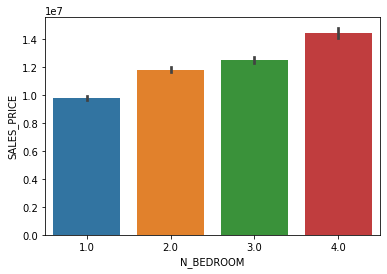

In [17]:
sns.barplot(x=train['N_BEDROOM'], y = train['SALES_PRICE'])

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

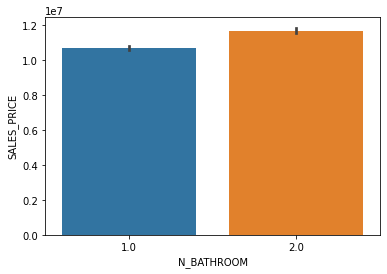

In [18]:
sns.barplot(x=train.N_BATHROOM, y=train.SALES_PRICE)

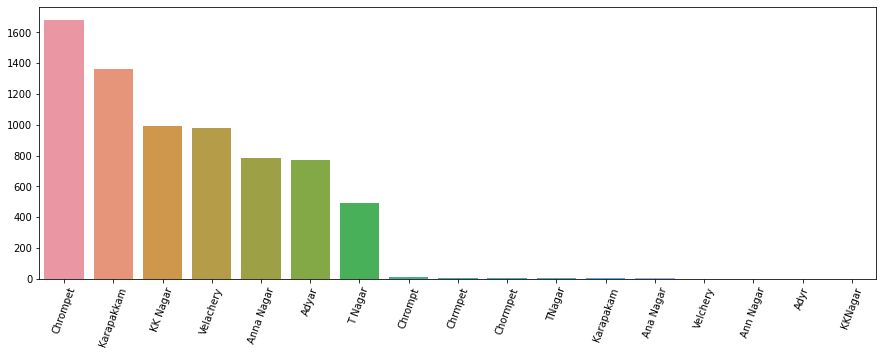

In [19]:
plt.figure(figsize=(15, 5))
s = sns.barplot(x=train.AREA.value_counts().index, y=train.AREA.value_counts().values)
plt.xticks(rotation=70)
plt.show()

In [20]:
train['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',
                       'Karapakam':'Karapakkam',
                       'Ana Nagar':'Anna Nagar','Anna NAgar':'Anna Nagar', 'Ann Nagar' : 'Anna Nagar',
                       'KKNagar':'KK Nagar',
                       'TNagar':'T Nagar',
                       'Velchery':'Velachery',
                       'Adyr':'Adyar'},inplace=True)
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

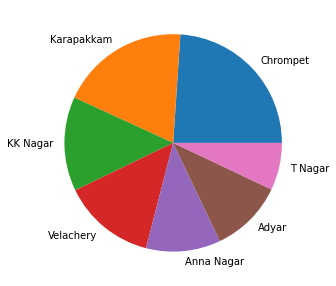

In [21]:
plt.figure(figsize=(15, 5))
plt.pie(train.AREA.value_counts().values, labels = train.AREA.value_counts().index)
plt.show()

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

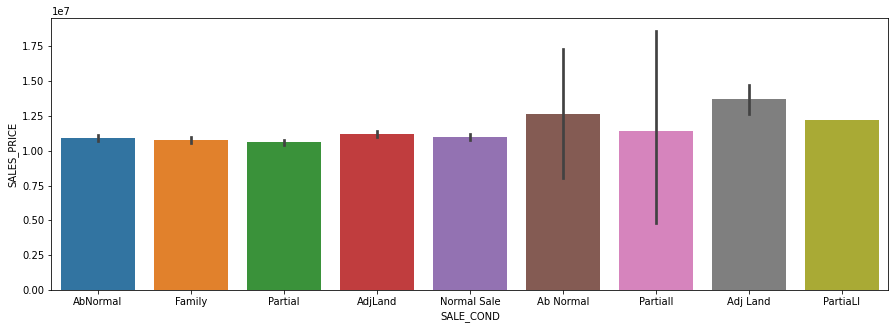

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(x=train.SALE_COND, y = train.SALES_PRICE)

In [23]:
train['SALE_COND'].replace({'Adj Land':'AdjLand',
                            'Ab Normal':'AbNormal',
                            'Partiall':'Partial','PartiaLl':'Partial'},inplace=True)
train['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

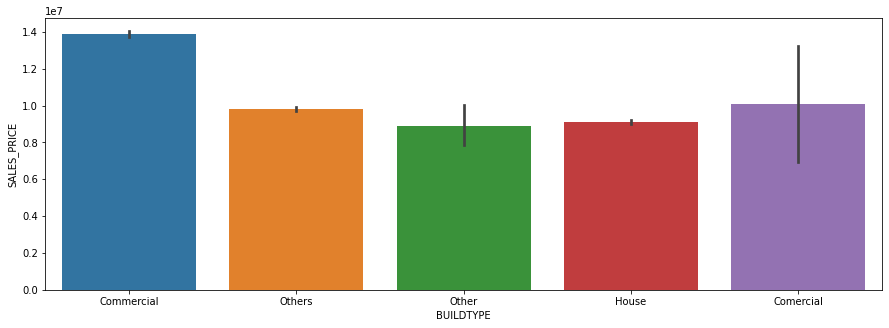

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(x=train.BUILDTYPE, y = train.SALES_PRICE)

In [25]:
train['BUILDTYPE'].replace({'Other' : 'Others', 'Comercial' : 'Commercial'}, inplace = True)
train['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

<AxesSubplot:>

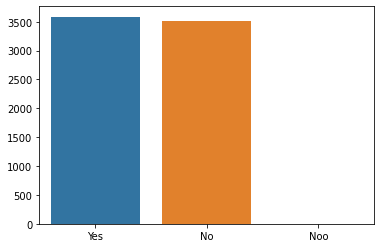

In [26]:
sns.barplot(x = train['PARK_FACIL'].value_counts().index, y = train['PARK_FACIL'].value_counts().values)

In [27]:
train['PARK_FACIL'].replace({'Noo' : 'No'}, inplace = True)
train['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [28]:
train['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [29]:
train['UTILITY_AVAIL'].replace({'All Pub' : 'AllPub'}, inplace = True)
train['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [30]:
train['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [31]:
train['STREET'].replace({'NoAccess' : 'No Access'}, inplace = True)
train['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2017
Pavd           12
Name: STREET, dtype: int64

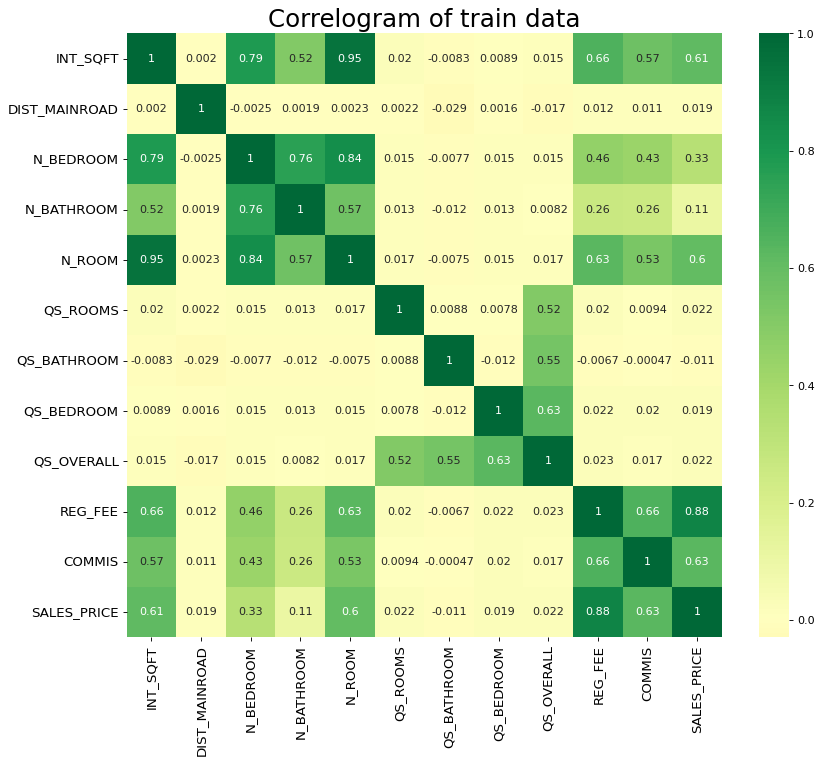

In [55]:
# correlation of dataset
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of train data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

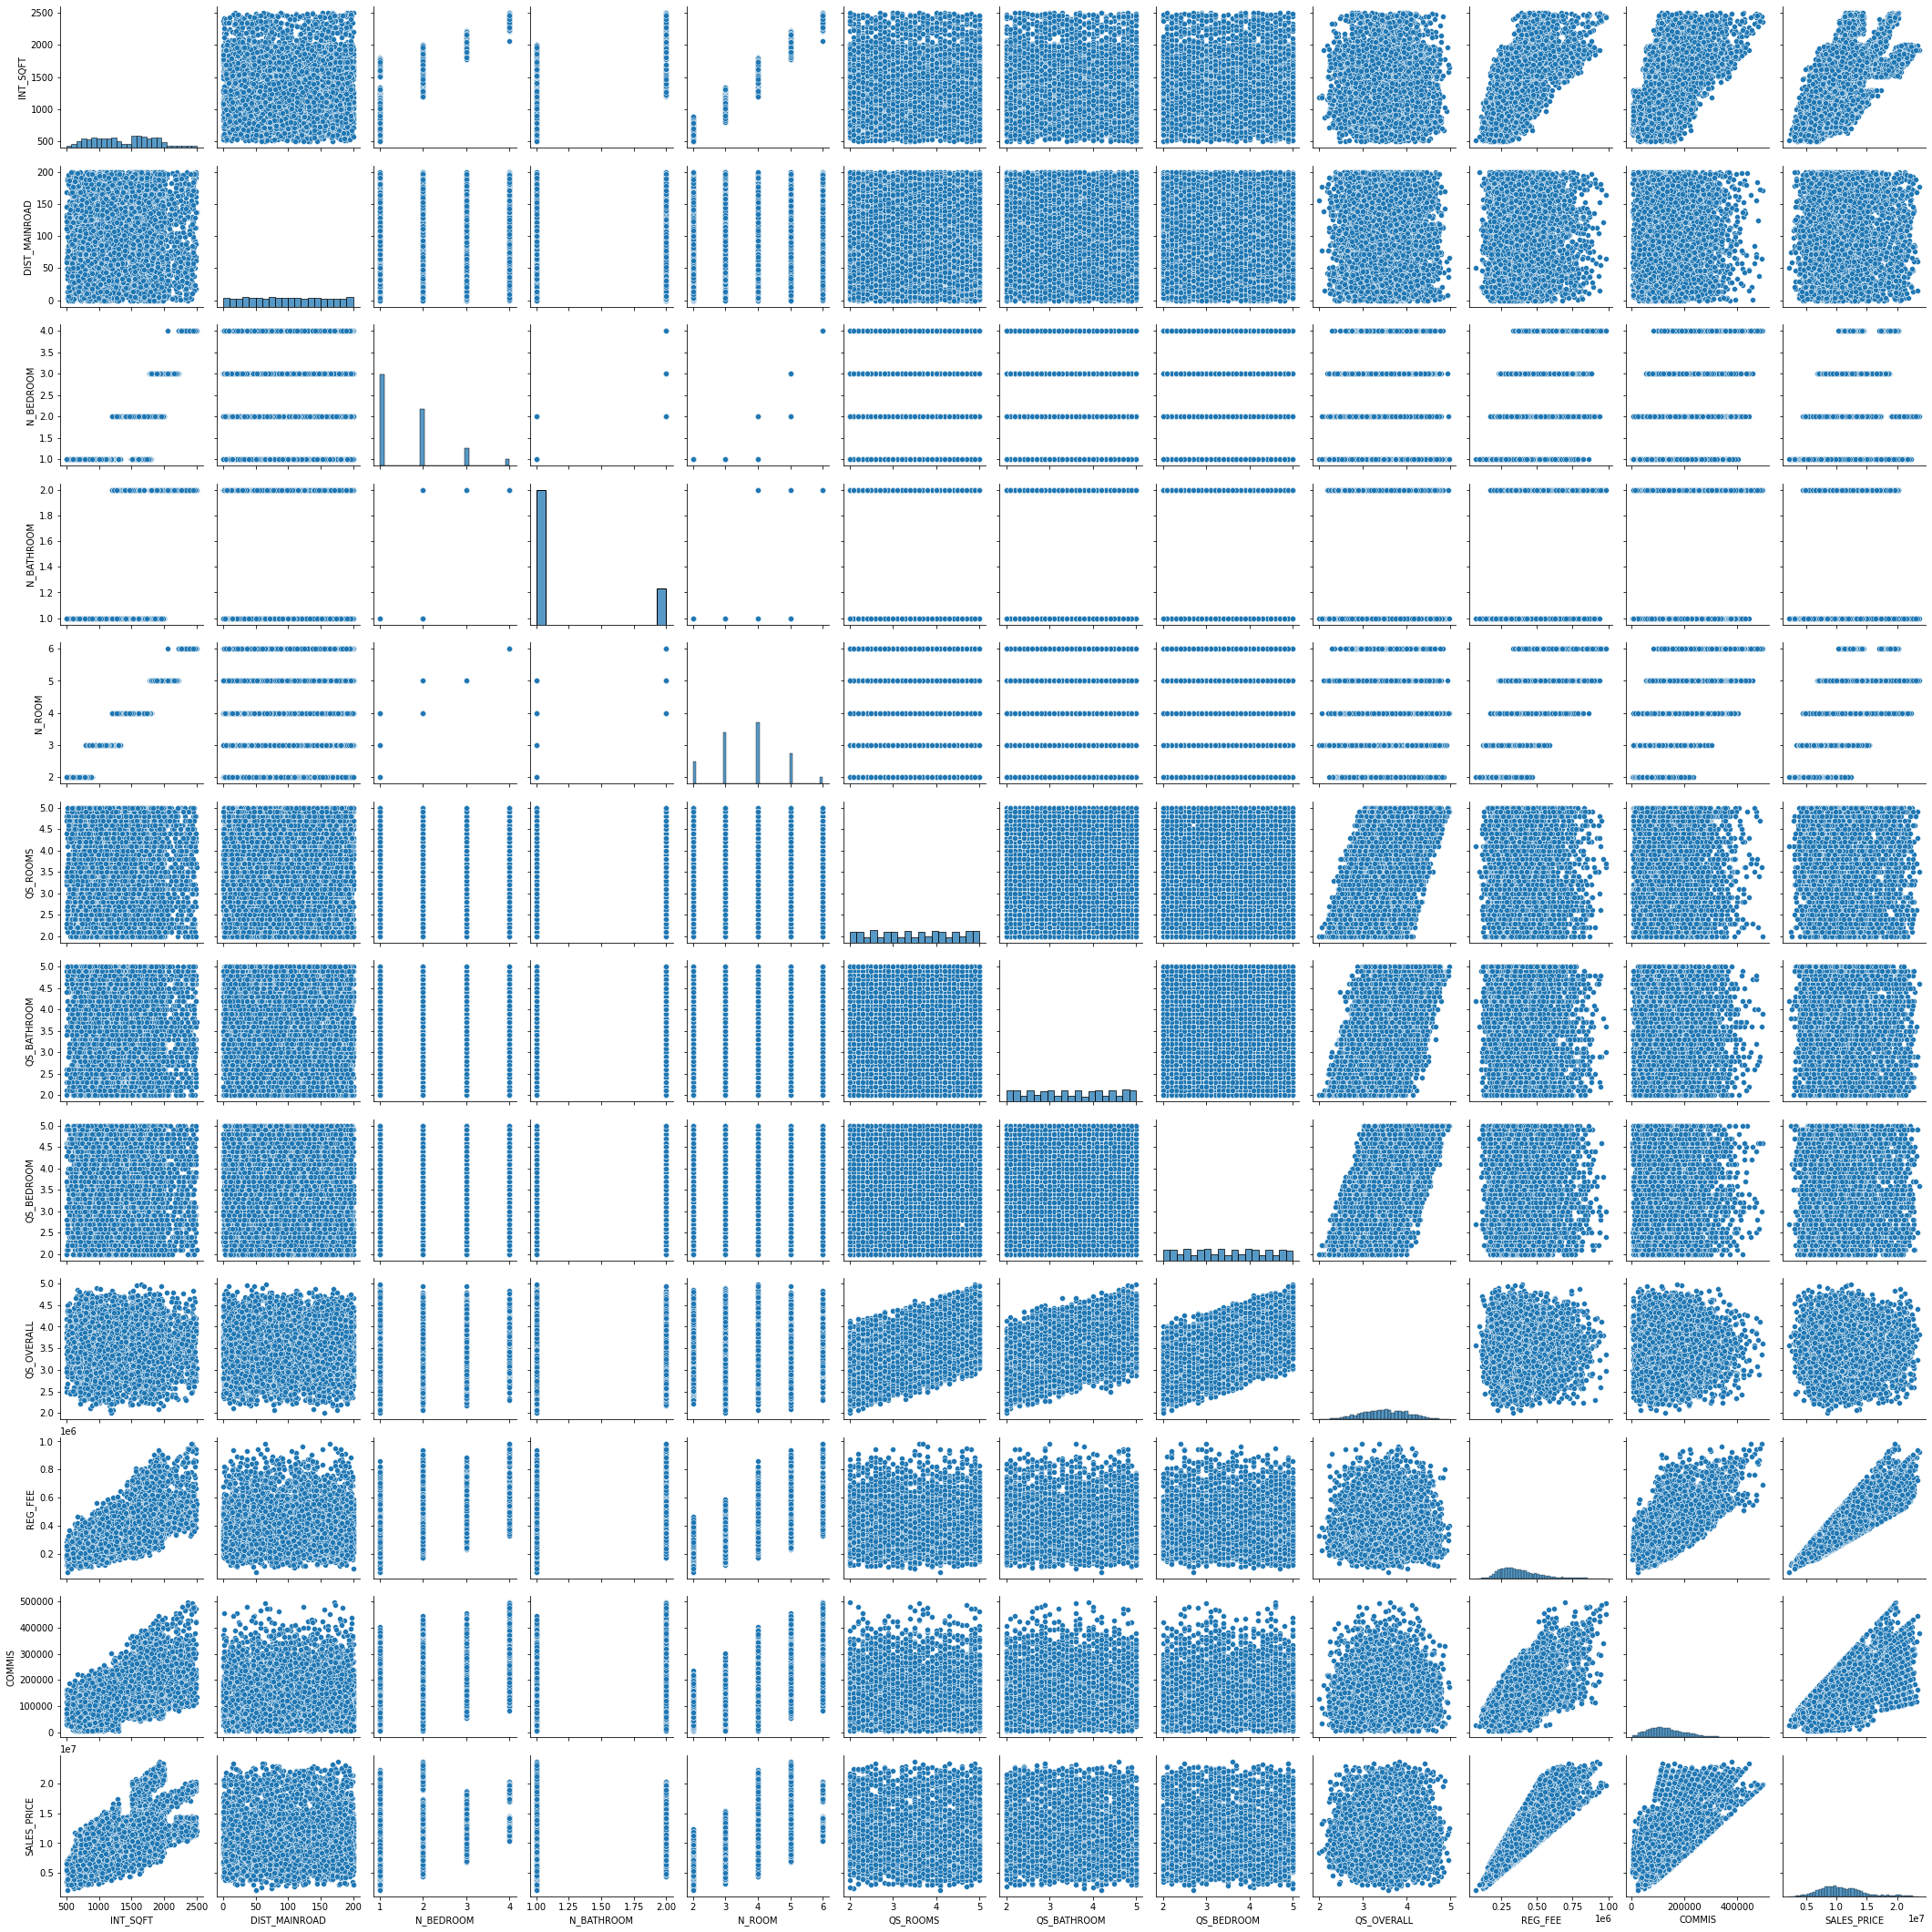

In [59]:
sns.pairplot(train)

### model building

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
df = train.copy()
df.drop(['PRT_ID','DATE_SALE','DATE_BUILD'],axis=1,inplace=True)
df = pd.get_dummies(df, drop_first = True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,YEAR_2006,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,...,0,0,0,0,0,1,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,...,1,0,0,0,0,0,0,0,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,...,0,0,0,0,0,0,1,0,0,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,...,0,0,0,0,1,0,0,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,...,0,0,0,1,0,0,0,0,0,0


In [36]:
x = df.drop(['SALES_PRICE'], axis = 1)
y = df['SALES_PRICE']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [39]:
model = LinearRegression().fit(x_train, y_train)

In [40]:
model.score(x_train, y_train)

0.9652540552349855

In [64]:
pred = model.predict(x_train)
pred[:10]

array([10879321.05894926,  7281090.11279792, 10029450.6295811 ,
       11763356.33629804, 12079509.63730139, 12192992.4951328 ,
        3941017.90197001,  7362367.22111022,  9970335.19915926,
        8690169.96697933])

In [66]:
y_train[:10]

6333    10354350
2112     7738700
181     10998320
4781    11035260
794     11262600
5155    12373200
1539     4703750
2345     7335200
3964     9946290
2789     9302665
Name: SALES_PRICE, dtype: int64

In [67]:
pred = model.predict(x_test)
pred[:10]

array([13844119.53708936,  7961585.0116506 , 17225739.82052333,
        6413928.65535593, 14912611.88162643,  9851283.60131038,
        7607682.77721144, 14338573.8413283 , 14926659.10170996,
       18174666.32444377])

In [69]:
y_test[:10]

457     12948200
1876     7524750
6307    16434500
3182     6705750
1188    15831550
4686     9316900
1728     7574830
3956    13234330
2561    14771930
6587    18076450
Name: SALES_PRICE, dtype: int64